In [69]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from skopt import BayesSearchCV
import subprocess
import matplotlib.pyplot as plt
import math  
import sklearn.metrics
import shap
from sklearn.tree import DecisionTreeRegressor

In [70]:
df = pd.read_csv('airbnb_model_fitting.csv')

In [71]:
X = df.loc[:, df.columns != 'price']
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.1, train_size = 0.9,  random_state=42)

In [72]:
regressor = RandomForestRegressor(n_estimators = 100, max_features = 1, max_depth = 10, min_samples_split = 20)
regressor.fit(X_train, y_train)

feature_importances = regressor.feature_importances_

# Create a pandas dataframe of feature importances
df_importances = pd.DataFrame({'feature': list(range(X_train.shape[1])), 'importance': feature_importances}).sort_values('importance', ascending=False)

# Select features with highest importance scores
top_features = df_importances[df_importances['importance'] >= 0.02]['feature'].values.tolist()

X_train_selected = X_train.iloc[:, top_features]
X_test_selected = X_test.iloc[:, top_features]
X_train_selected.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3685 entries, 3891 to 3174
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   bathrooms_number           3685 non-null   float64
 1   accommodates               3685 non-null   int64  
 2   bedrooms                   3685 non-null   float64
 3   beds                       3685 non-null   float64
 4   property_type              3685 non-null   int64  
 5   latitude                   3685 non-null   float64
 6   longitude                  3685 non-null   float64
 7   bathrooms_type             3685 non-null   int64  
 8   room_type                  3685 non-null   int64  
 9   white_goods                3685 non-null   float64
 10  neighbourhood_cleansed     3685 non-null   int64  
 11  host_total_listings_count  3685 non-null   int64  
 12  average_nearest_price      3685 non-null   float64
 13  bbq                        3685 non-null   fl

In [73]:
X_train_1 = X_train_selected
y_train_1 = y_train

X_test_1 = X_test_selected
y_test_1 = y_test

In [74]:
rf = RandomForestRegressor(n_estimators = 40, max_features = 1, max_depth = 10, min_samples_split = 10)
rf.fit(X_train_1, y_train_1)
y_predict_rf = rf.predict(X_test_1)

In [75]:
importancesRF = rf.feature_importances_
feat_imp1 = pd.DataFrame(importancesRF, columns=['Weight'], index=X_train_1.columns)
feat_imp1.sort_values('Weight', inplace=True, ascending=False)

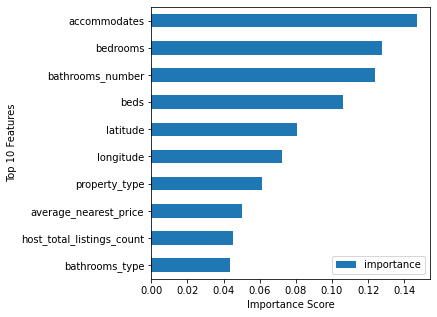

In [77]:
feat_imp = pd.DataFrame({'importance':rf.feature_importances_})  
feat_imp['feature'] = X_train_1.columns
feat_imp.sort_values(by='importance', ascending=False, inplace=True)

feat_imp.sort_values(by='importance', inplace=True)
feat_imp = feat_imp.set_index('feature', drop=True)
feat_imp = feat_imp[len(feat_imp1)-10:len(feat_imp1)]
feat_imp.plot.barh(figsize=(5,5))
plt.xlabel('Importance Score')
plt.ylabel('Top 10 Features')
plt.show()

In [66]:
mse = sklearn.metrics.mean_squared_error(y_test_1, y_predict_rf)  
mae_rf_1 = sklearn.metrics.mean_absolute_error(y_test_1, y_predict_rf) 

rmse_rf_1 = math.sqrt(mse)  

print("RMSE = ", rmse_rf_1)
print("MAE = ", mae_rf_1)

RMSE =  56.59978189982079
MAE =  43.75409932244056


In [67]:
from dtreeviz.trees import *

selected_tree = rf.estimators_[0]

viz_model = dtreeviz(selected_tree,
                       x_data=X_train_1,
                       y_data=y_train_1,
                       target_name='price',
                       feature_names=X_train_1.columns)

In [33]:
viz_model.view()

In [68]:
viz_model.save("tree.svg")